In [1]:
%matplotlib inline
import numpy as np
import random as rand
import matplotlib.pyplot as plt
import copy
import os
import scipy.cluster.hierarchy as cluster

In [5]:
# Load distance matrixes
Ts_distances = np.load("Ts_distances.npy");
Tf_distances = np.load("Tf_distances.npy");

# Load labels and PTN data
root = "/home/melchior/extended/P5-Clustering/GygiAnalysis";

path = os.path.join(root, "AnalysisOfGygiDataset.npz");
dataset = np.load(path); 
dataset = dataset['arr_0'].item()
labels = dataset['labels'];

In [6]:
# Unclustered data



In [7]:
def compute_total_cost(distance_matrix, medoids):
    
    N = len(distance_matrix);
    
    distance_to_medoids = distance_matrix[medoids];
    cluster_indexes = np.argmin(distance_to_medoids, axis=0);
    
    total_cost = 0;
    for i in range(N):
        total_cost += distance_to_medoids[cluster_indexes[i]][i];
    return total_cost;

def kMedoid(distance_matrix, K):
    
    N = len(distance_matrix);
    
    # Choose first set of medoids randomly
    medoids_best = rand.sample(range(N), K);
    cost_best = compute_total_cost(distance_matrix, medoids_best);

    # for each cluster: 
    #    test if a change in the medoid produces a lower cost
    for k in range(K):
        medoids_new = copy.copy(medoids_best); 
    
        for i in range(N):
            if (i not in medoids_new): # if medoid is not already in the list
                medoids_new[k] = i;    
                cost_new = compute_total_cost(distance_matrix, medoids_new);
                
                # test if new medoids have a lower cost 
                if (cost_new < cost_best):
                    cost_best = copy.copy(cost_new);
                    medoids_best = copy.copy(medoids_new);
    
    return medoids_best;

def gather_cluster_data(data, indexes, cluster_index):
    equals = lambda i : indexes[i] == cluster_index;
    filtered_indexes = filter(equals, range(0, len(data)));
    return data[filtered_indexes];

In [8]:
number_of_clusters = 3;

Ts_medoids_best = kMedoid(Ts_distances, number_of_clusters)
Ts_cluster_indexes = np.argmin(Ts_distances[Ts_medoids_best], axis=0);

Tf_medoids_best = kMedoid(Tf_distances, number_of_clusters)
Tf_cluster_indexes = np.argmin(Tf_distances[Tf_medoids_best], axis=0);

In [13]:
# Plot dataset['P_logsumE_onn_FS'] vrs dataset['T_logsumE_onn_FS']

def visualize_cluster(handle, indexes, labels, title):
        
    xlabel = labels[0];
    ylabel = labels[1];
    
    #for each cluster plot cluster points
    for i in range(number_of_clusters):
        x = gather_cluster_data(dataset[xlabel], indexes, i)
        y = gather_cluster_data(dataset[ylabel], indexes, i)
        handle.plot(x, y, 'p');

    handle.set_title(title)
    handle.set_xlabel(xlabel)
    handle.set_ylabel(ylabel)

def compare_clusters(indexes, labels, titles):
    
    fig = plt.figure(figsize=(18, 6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    visualize_cluster(ax1, indexes[0], labels, titles[0])
    visualize_cluster(ax2, indexes[1], labels, titles[1])

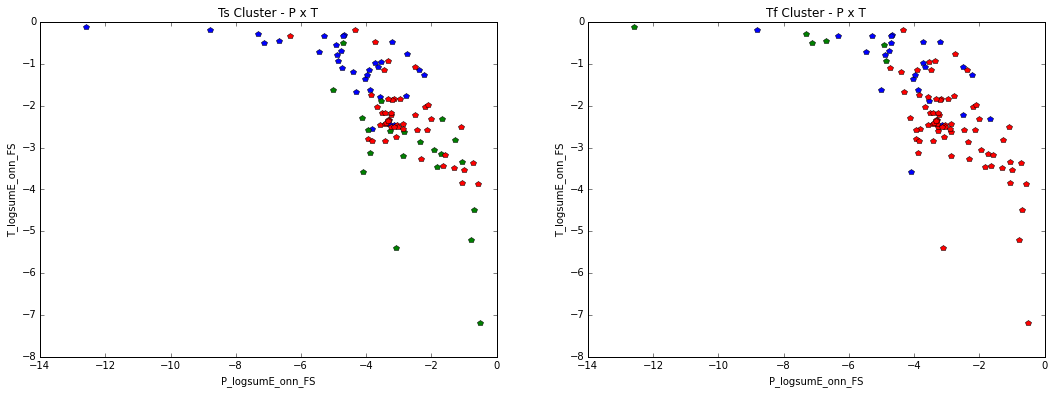

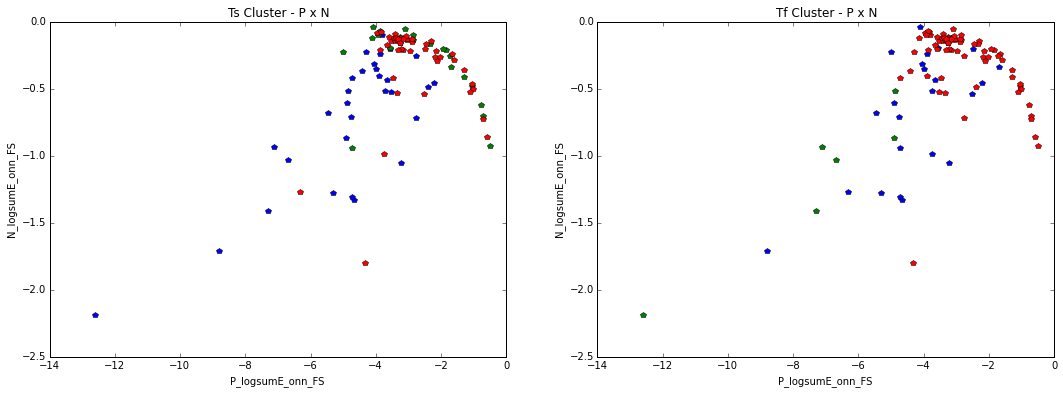

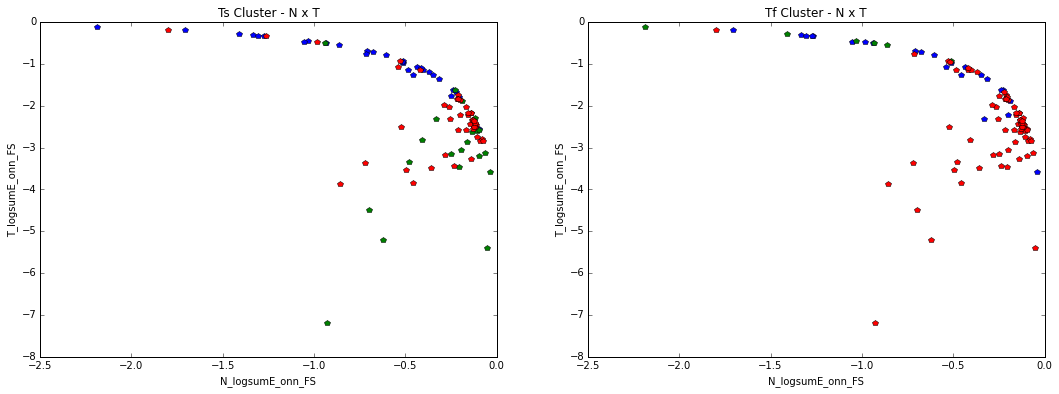

In [14]:
P = 'P_logsumE_onn_FS';
T = 'T_logsumE_onn_FS';
N = 'N_logsumE_onn_FS';

indexes = [Ts_cluster_indexes, Tf_cluster_indexes];
compare_clusters(indexes, [P, T], ["Ts Cluster - P x T", "Tf Cluster - P x T"])
compare_clusters(indexes, [P, N], ["Ts Cluster - P x N", "Tf Cluster - P x N"])
compare_clusters(indexes, [N, T], ["Ts Cluster - N x T", "Tf Cluster - N x T"])

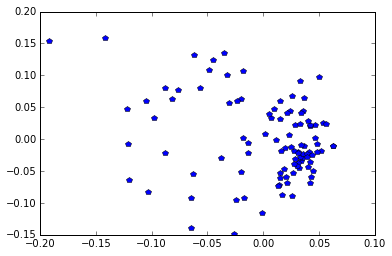

In [32]:
# Multi-dimensional scaling attempt
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

seed = np.random.RandomState(seed=3)
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(Ts_distances).embedding_

plt.plot(pos[:, 0], pos[:, 1], 'p');